In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fm2p

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [74]:
ops = np.load(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\suite2p\plane0\ops.npy', allow_pickle=True)
stat = np.load(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\suite2p\plane0\stat.npy', allow_pickle=True)
iscell = np.load(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\suite2p\plane0\iscell.npy')

In [75]:
usecells = iscell[:,0]==1

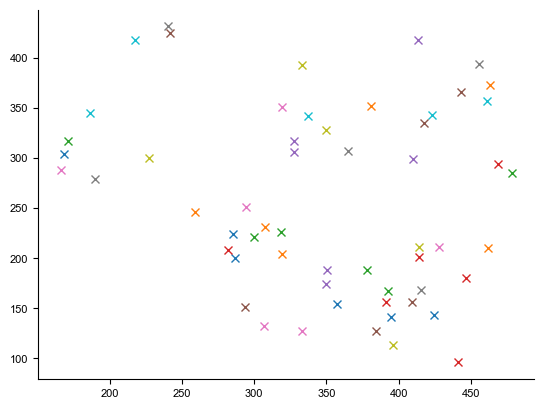

In [76]:
for cell in stat[usecells]:
    plt.plot(np.mean(cell['xpix']), np.mean(cell['ypix']), 'x')

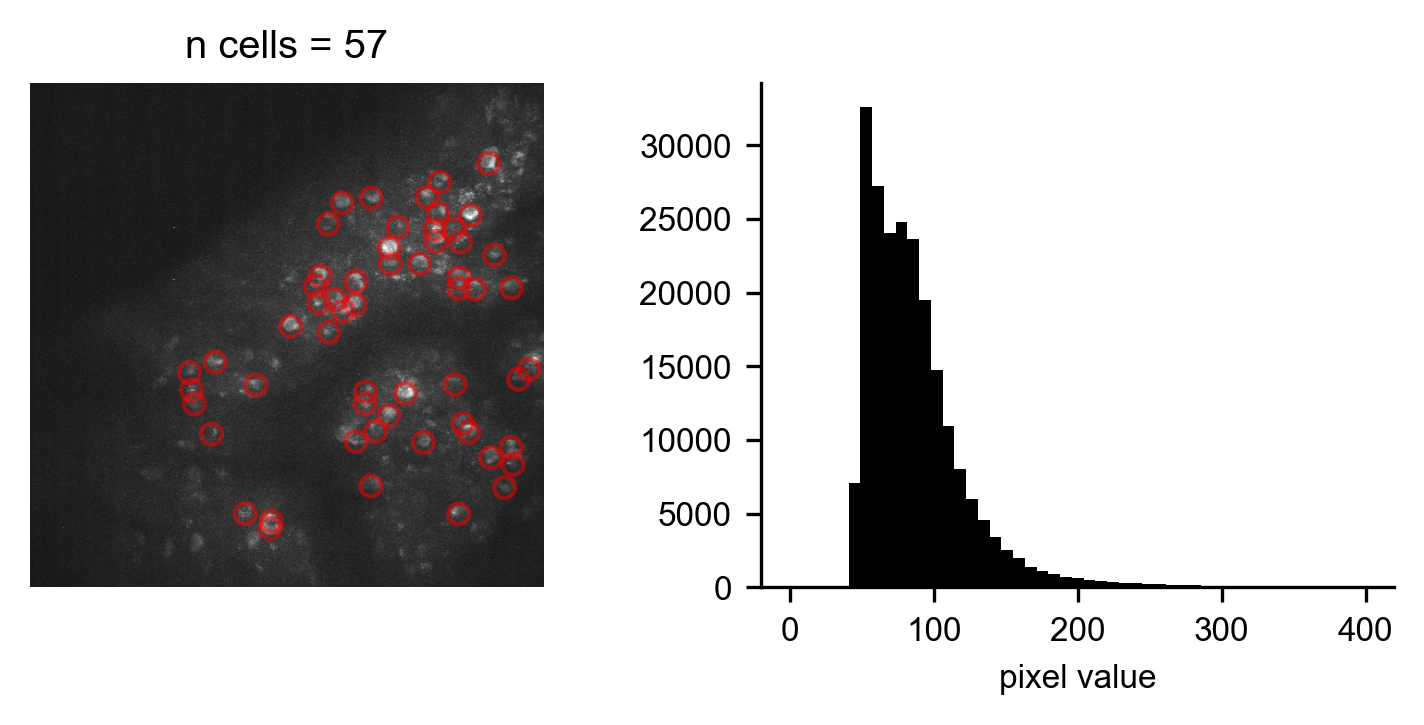

In [94]:
fig, [ax1,ax2] = plt.subplots(1,2, dpi=300, figsize=(5,2.4))

ax1.imshow(ops.item()['max_proj'], cmap='gray', vmin=0, vmax=500)
ax1.axis('off')
for cell in stat[usecells]:
    # ax1.plot(np.mean(cell['xpix']), np.mean(cell['ypix']), 'o', ms=10, fill='none')
    ax1.scatter(np.mean(cell['xpix'])-20, np.mean(cell['ypix'])-22, s=25, facecolors='none', edgecolors='r', alpha=0.5)
ax1.set_title('n cells = {}'.format(np.sum(usecells)))

ax2.hist(ops.item()['max_proj'].flatten(), bins=np.linspace(0,400), color='k')
ax2.set_xlabel('pixel value')

fig.tight_layout()

In [3]:
# plot behavioral occupancy
data = fm2p.read_h5(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\250306_DMM_DMM038_fm_1_preproc.h5')

26.804444444444446

In [36]:
ego_bins = np.linspace(-180, 180, 36)
retino_bins = np.linspace(-180, 180, 36)
pupil_bins = np.linspace(50, 100, 10)

speed = data['speed'].copy()
speed = np.append(speed, speed[-1])
use = speed > 2.

In [97]:
dist = data['dist_to_center'].copy()

In [101]:
np.sum(np.isnan(dist)), len(dist)

(12063, 12063)

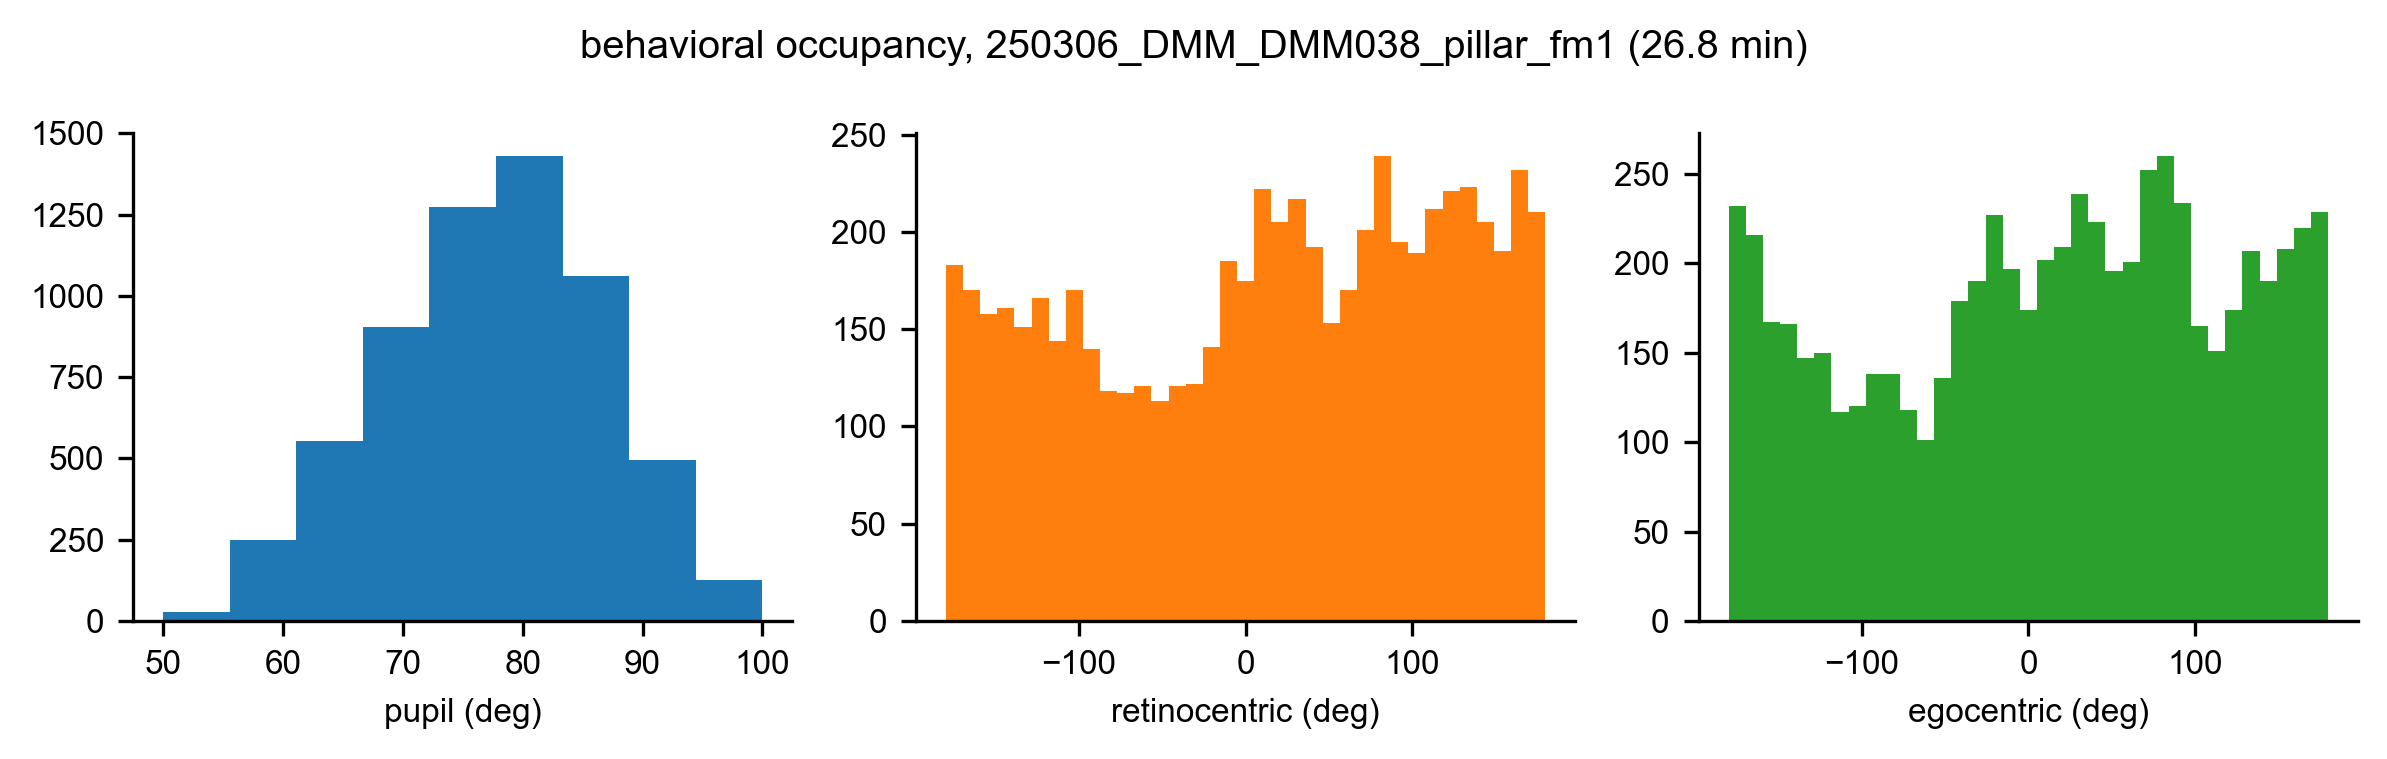

In [43]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, dpi=300, figsize=(8,2.5))
ax1.hist(data['pupil_from_head'][use], bins=pupil_bins, color='tab:blue')
ax1.set_xlabel('pupil (deg)')
ax2.hist(data['retinocentric'][use], bins=retino_bins, color='tab:orange')
ax2.set_xlabel('retinocentric (deg)')
ax3.hist(data['egocentric'][use], bins=ego_bins, color='tab:green')
ax3.set_xlabel('egocentric (deg)')
fig.suptitle('behavioral occupancy, 250306_DMM_DMM038_pillar_fm1 (26.8 min)')
fig.tight_layout()

Text(0.5, 0.98, '250306_DMM_DMM038_pillar_fm1 cell 8')

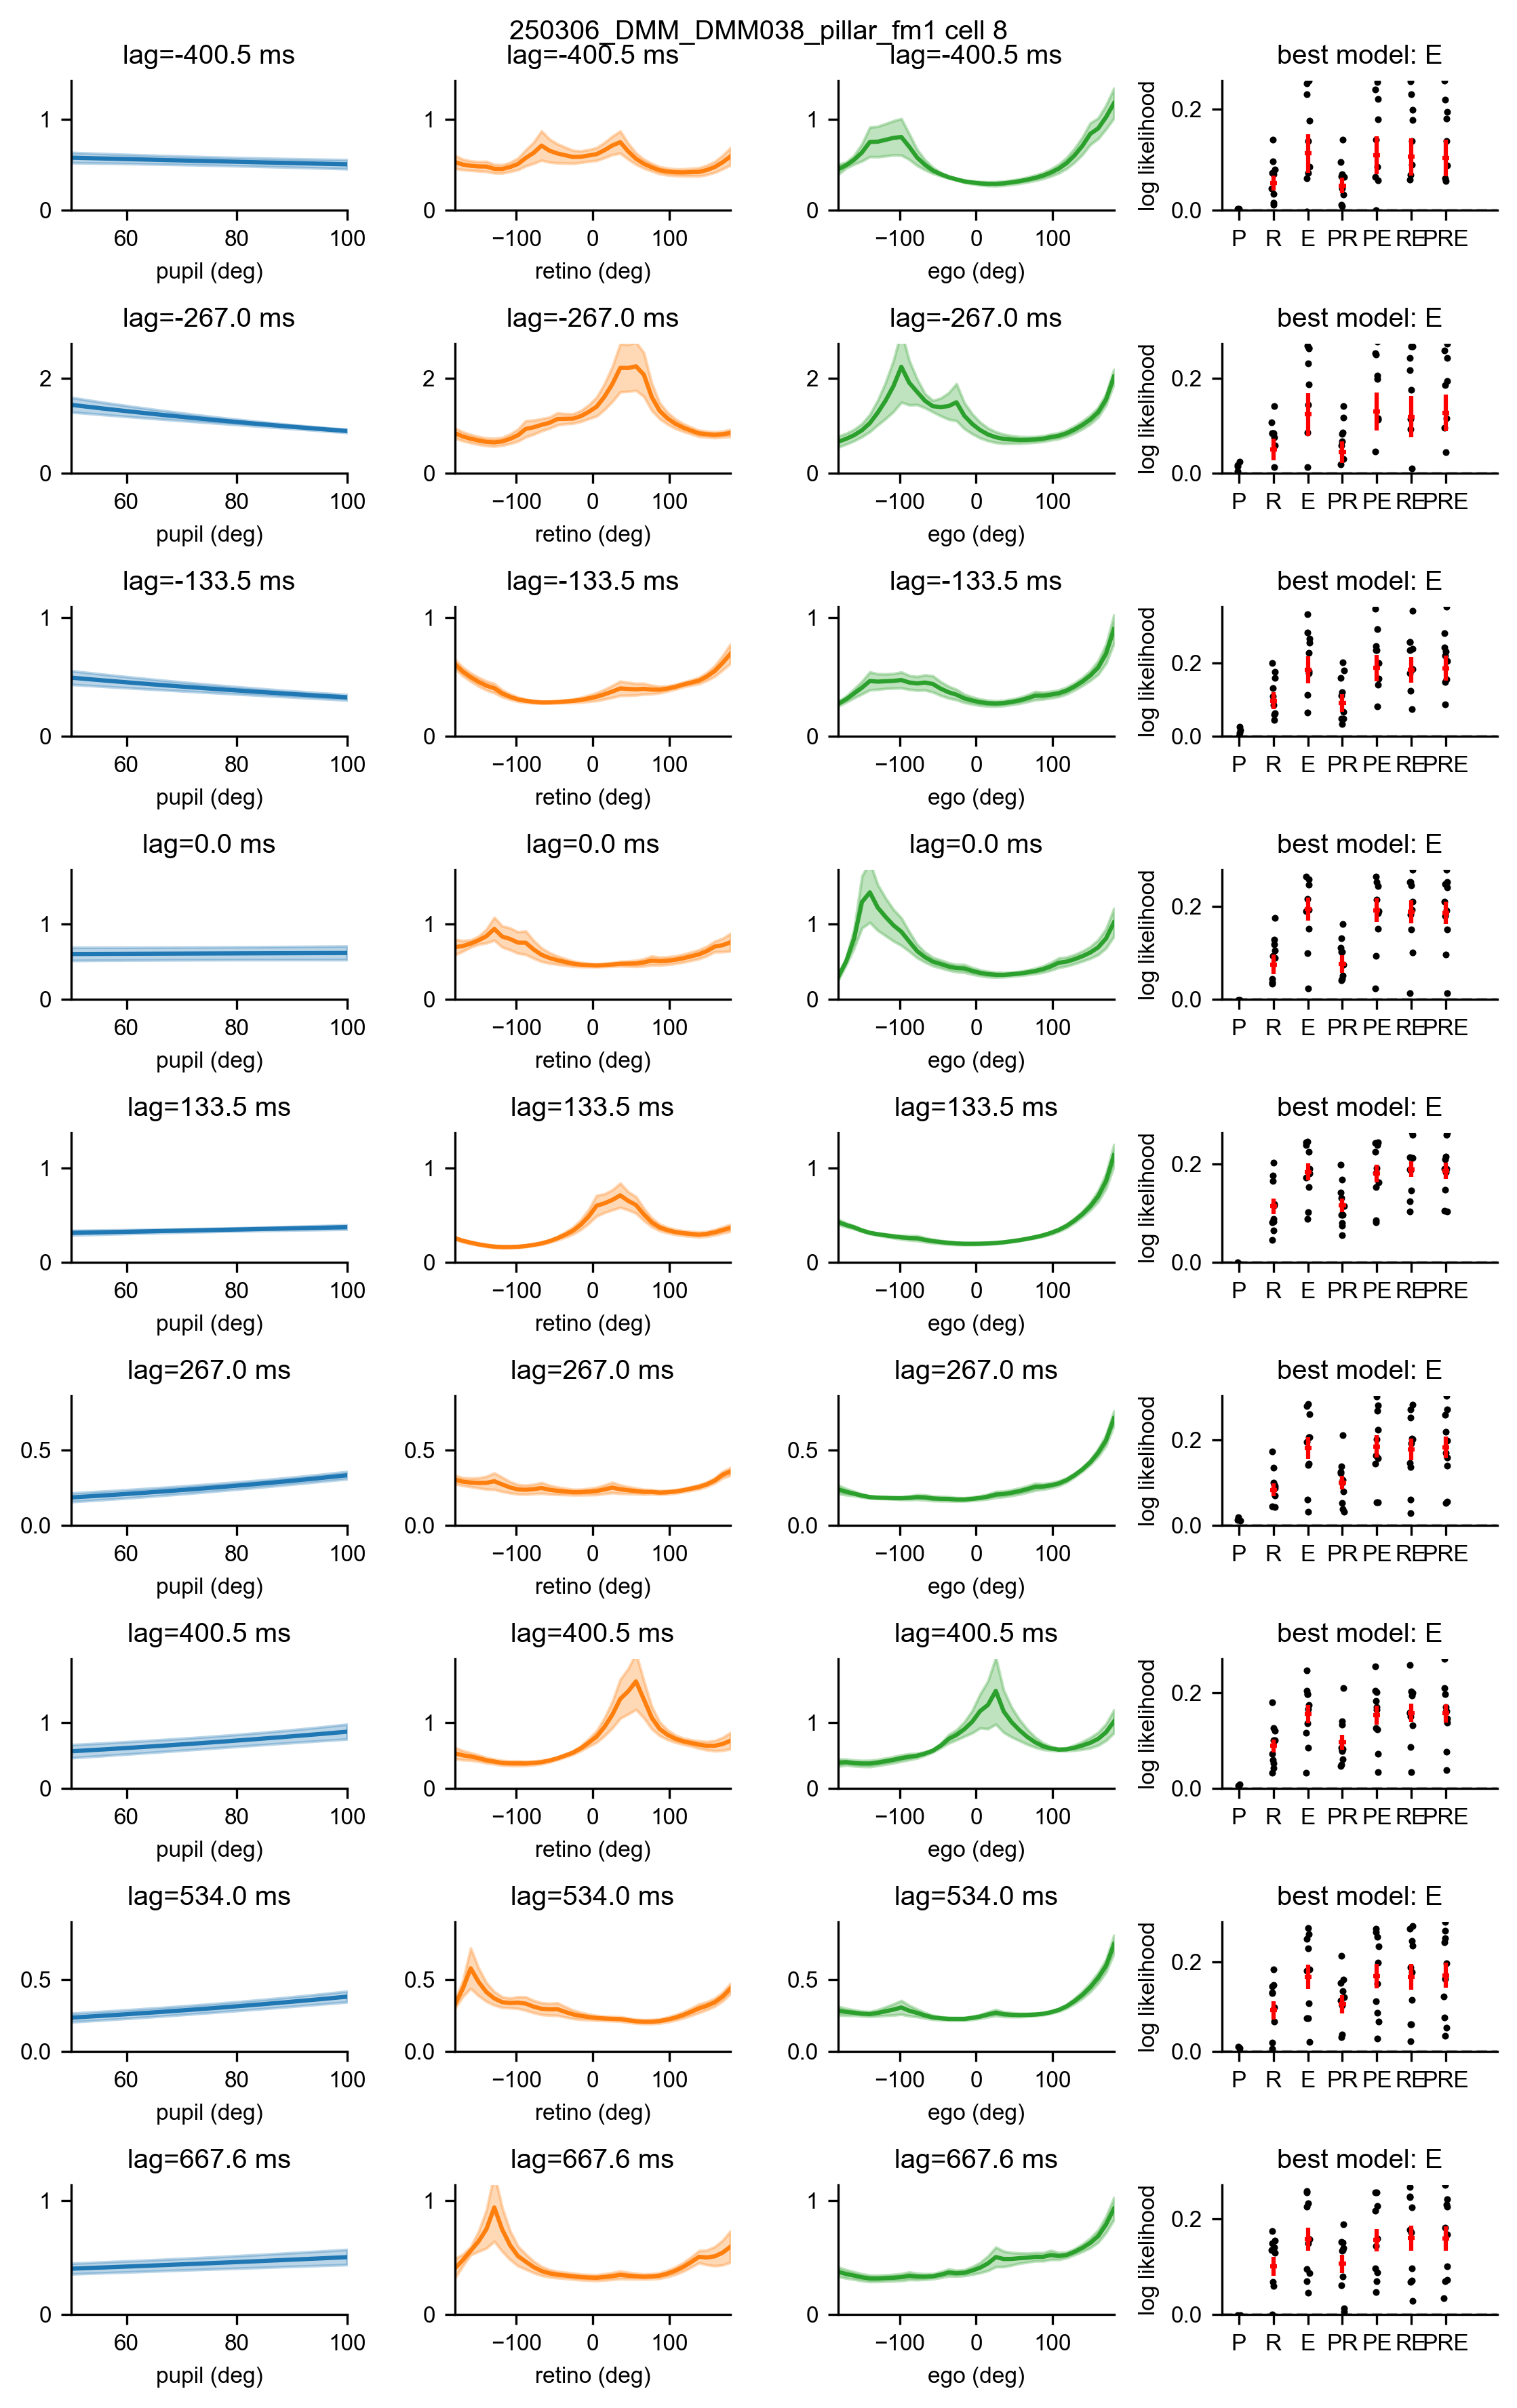

In [122]:
cell_str = '8'

fig, axs = plt.subplots(9, 4, figsize=(7.5,12), dpi=300)
# spec = gridspec.GridSpec(ncols=4, nrows=9, figure=fig)

for panel_ind, lag_ind in enumerate([-3,-2,-1,0,1,2,3,4,5]):

    lag_val = (1/7.49) * lag_ind * 1000

    model_output_dir = r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\fm_fit_v01_lag_{}'.format(str(lag_ind))
    model_data = fm2p.read_models(model_output_dir)

    (predP, stderrP), (predR, stderrR), (predE, stderrE) = fm2p.calc_scaled_LNLP_tuning_curves(
        model_data, cell_str, ret_stderr=True, params=None, param_stderr=None)

    fig = fm2p.plot_scaled_LNLP_tuning_curves(
            predP, predR, predE,
            stderrP, stderrR, stderrE,
            np.deg2rad(pupil_bins), np.deg2rad(retino_bins), np.deg2rad(ego_bins),
            fig=fig, axs=[axs[panel_ind,0], axs[panel_ind,1], axs[panel_ind,2]]
    )

    fig = fm2p.plot_model_LLHs(model_data, cell_str, test_only=True, fig=fig, ax=axs[panel_ind,3], tight_y_scale=True)
    axs[panel_ind,3].set_ylabel('log likelihood')

    eval_results = fm2p.eval_models(model_data, cell_str)

    axs[panel_ind,3].set_title('best model: {}'.format(eval_results['best_model']))
    
    for i in range(0,3):
        axs[panel_ind,i].set_title('lag={:.4} ms'.format(lag_val))

    axs[panel_ind,0].set_xlim([50,100])
    axs[panel_ind,1].set_xlim([-180,180])
    axs[panel_ind,2].set_xlim([-180,180])

fig.suptitle('250306_DMM_DMM038_pillar_fm1 cell {}'.format(cell_str))

In [123]:
model_data = fm2p.read_models(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\fm_fit_v01_lag_1')
all_best_LLHs = fm2p.get_cells_best_LLHs(model_data)

null_data = fm2p.read_models(r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\fm_fit_v01_null')
all_null_LLHs = fm2p.get_cells_best_LLHs(null_data)

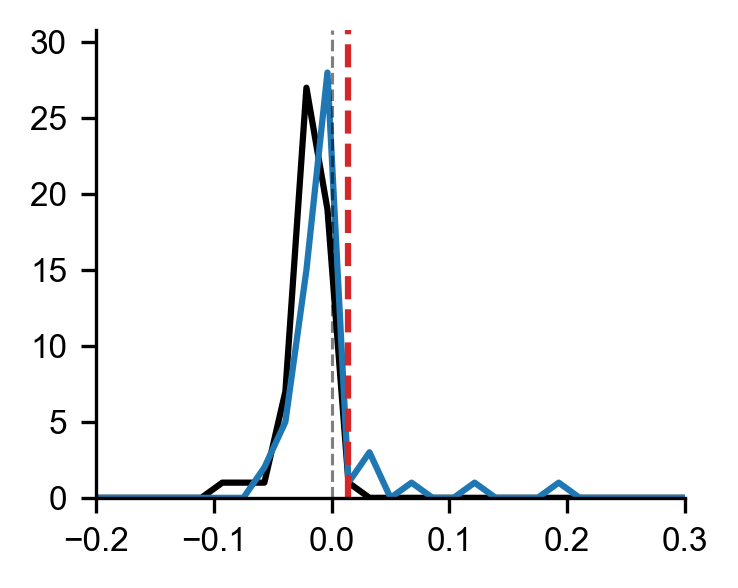

In [137]:
responsive_thresh, _ = fm2p.determine_responsiveness_from_null(model_data, null_data)
responsive_inds = fm2p.get_responsive_inds(model_data, LLH_threshold=responsive_thresh)

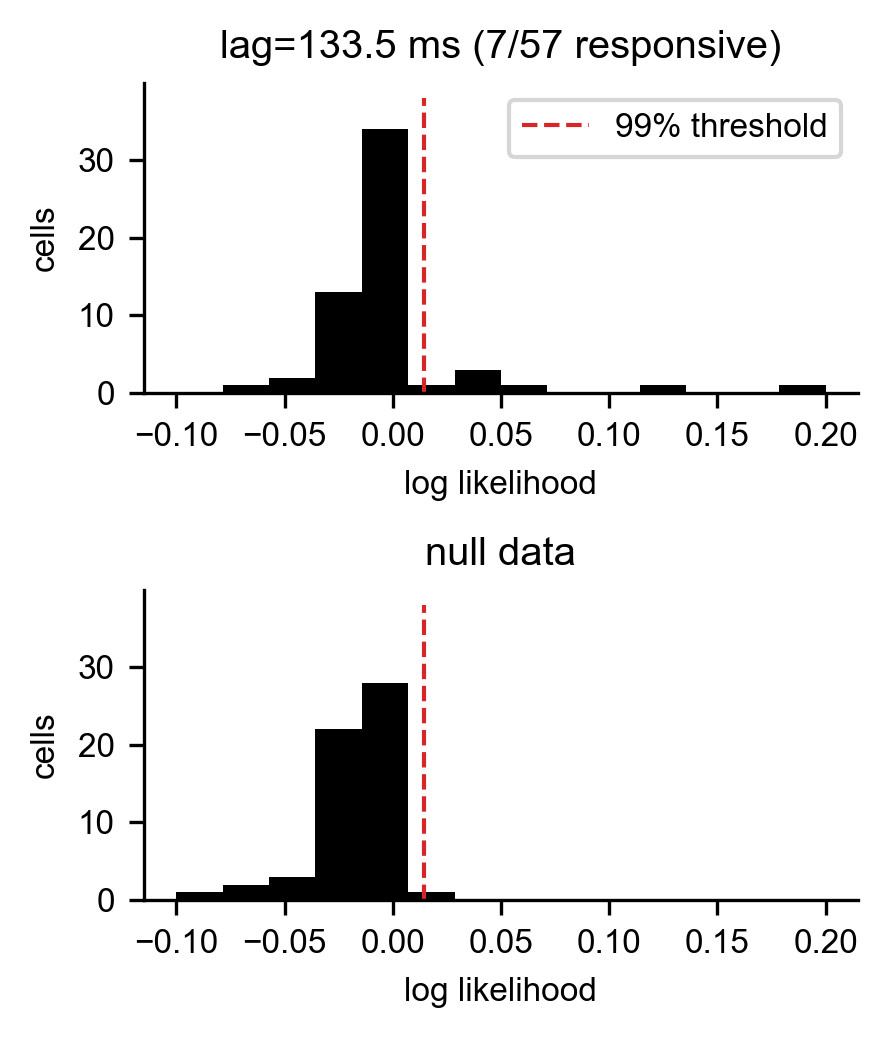

In [151]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(3,3.5), dpi=300)
ax1.hist(all_best_LLHs, bins=np.linspace(-.1,.2, 15), color='k', lw=3)
ax1.set_xlabel('log likelihood')
ax1.set_ylabel('cells')

ax2.hist(all_null_LLHs, bins=np.linspace(-.1,.2, 15), color='k', lw=3)
ax2.set_xlabel('log likelihood')
ax2.set_ylabel('cells')

ax1.vlines(responsive_thresh, 0, 38, color='tab:red', ls='--', lw=1, label='99% threshold')

ax2.vlines(responsive_thresh, 0, 38, color='tab:red', ls='--', lw=1, label='99% threshold')

ax1.legend()
# ax2.legend()

ax1.set_title('lag=133.5 ms ({}/{} responsive)'.format(np.sum(all_best_LLHs>responsive_thresh), len(all_best_LLHs)))
ax2.set_title('null data')

fig.tight_layout()

In [188]:
def tuning_curve(sps, x, x_range):
    """ Calculate tuning curve of neurons to a 1D variable.

    Parameters
    ----------
    sps : np.array
        Spike data. Shape should be (n_cells, n_timepoints).
    x : np.array
        Variable data. Shape should be (n_cells, n_timepoints). The
        timepoints should match those for `sps`, either by interpolation
        or by binning.
    x_range : np.array
        Array of values to bin x into.
    
    Returns
    -------
    var_cent : np.array
        Array of values at the center of each bin. Shape is (n_bins,)
    tuning : np.array
        Array of mean spike counts for each bin. Shape is (n_cells, n_bins).
    tuning_err : np.array
        Array of standard error of the mean spike counts for each bin. Shape
        is (n_cells, n_bins).
    """

    n_cells = np.size(sps,0)

    scatter = np.zeros((n_cells, np.size(x,0)))

    tuning = np.zeros((n_cells, len(x_range)-1))
    tuning_err = tuning.copy()
    var_cent = np.zeros(len(x_range)-1)
    
    for j in range(len(x_range)-1):
        
        var_cent[j] = 0.5*(x_range[j] + x_range[j+1])
    
    for n in range(n_cells):
        
        scatter[n,:] = sps[n,:]
        
        for j in range(len(x_range)-1):
            
            usePts = (x>=x_range[j]) & (x<x_range[j+1])
            
            tuning[n,j] = np.nanmean(scatter[n, usePts])
            
            tuning_err[n,j] = np.nanstd(scatter[n, usePts]) / np.sqrt(np.count_nonzero(usePts))

    return var_cent, tuning, tuning_err

def plot_tuning(ax, var_cent, tuning, tuning_err, color, rad=True):
    if rad:
        usebins = np.rad2deg(var_cent)
    else:
        usebins = var_cent.copy()
    ax.plot(usebins, tuning[0], color=color)
    ax.fill_between(
        usebins,
        tuning[0]+tuning_err[0],
        tuning[0]-tuning_err[0],
        alpha=0.3, color=color
    )
    ax.set_xlim([var_cent[0], var_cent[-1]])

In [168]:
h5_path = r'K:\Mini2P\250306_DMM_DMM038_pillar\fm1\250306_DMM_DMM038_fm_1_preproc.h5'
data = fm2p.read_h5(h5_path)

In [197]:
np.size(spikes, 0)

57

In [198]:
from matplotlib.backends.backend_pdf import PdfPages

In [200]:

spikes = data['oasis_spks'].copy()

egocentric = data['egocentric'].copy()
retinocentric = data['retinocentric'].copy()
pupil = data['pupil_from_head'].copy()
speed = data['speed'].copy()
speed = np.append(speed, speed[-1])
use = speed > 2.

ego_bins = np.linspace(-180, 180, 18)
retino_bins = np.linspace(-180, 180, 18)
pupil_bins = np.linspace(60, 95, 12)

lag_vals = [-3,-2,-1,0,1,2,3,4,5]

spiketrains = np.zeros([
    np.size(spikes,0),
    np.sum(use)
]) * np.nan

pdf = PdfPages('250306_DMM_DMM038_pillar_fm1_revcorrRFs_v01.pdf')

for c_i in range(np.size(spikes, 0)):

    fig, axs = plt.subplots(3, 9, dpi=300, figsize=(14,4))

    _maxtuning = 0

    for lag_ind, lag_val in enumerate(lag_vals):
        
        for cell_i in range(np.size(spikes,0)):
            spiketrains[cell_i,:] = np.roll(spikes[cell_i,:], shift=lag_val)[use]

        pupil_cent, pupil_tuning, pupil_err = tuning_curve(spiketrains[c_i,:][np.newaxis,:], pupil[use], pupil_bins)
        ret1_cent, ret1_tuning, ret1_err = tuning_curve(spiketrains[c_i,:][np.newaxis,:], retinocentric[use], retino_bins)
        ego1_cent, ego1_tuning, ego1_err = tuning_curve(spiketrains[c_i,:][np.newaxis,:], egocentric[use], ego_bins)

        plot_tuning(axs[0,lag_ind], pupil_cent, pupil_tuning, pupil_err, 'tab:blue', False)
        plot_tuning(axs[1,lag_ind], ret1_cent, ret1_tuning, ret1_err, 'tab:orange', False)
        plot_tuning(axs[2,lag_ind], ego1_cent, ego1_tuning, ego1_err, 'tab:green', False)

        lag_str = (1/7.49) * 1000 * lag_val
        axs[0,lag_ind].set_title('lag={:.4} ms'.format(lag_str))
        axs[0,lag_ind].set_xlabel('pupil (deg)')
        axs[1,lag_ind].set_xlabel('retino (deg)')
        axs[2,lag_ind].set_xlabel('ego (deg)')

        for x in [np.nanmax(pupil_tuning+pupil_err), np.nanmax(ret1_tuning+ret1_err), np.nanmax(ego1_tuning+ego1_err)]:
            if x > _maxtuning:
                _maxtuning = x

    axs = axs.flatten()
    for ax in axs:
        ax.set_ylim([0, _maxtuning])
        ax.set_ylabel('sp/s')

    fig.suptitle('cell {}'.format(c_i))

    fig.tight_layout()
    pdf.savefig(fig)
    plt.close()

pdf.close()